In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# acquiring movies dataset
movie=pd.read_csv("movies.dat",sep = '::',engine='python',encoding='latin-1')
movie.columns =['MovieIDs','MovieName','Category']
movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [32]:
# acquiring rating dataset
rating = pd.read_csv("ratings.dat",sep='::', engine='python')
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [33]:
# acquiring users dataset
user = pd.read_csv("users.dat",sep='::',engine='python')
user.columns =['UserID','Gender','Age','Occupation','Zip-code']
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [34]:
# merging the data
data = pd.concat([movie, rating, user], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [35]:
# cleaning the data
data.isnull().sum()    # check the total null values

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [38]:
data.dropna(inplace=True)        # dropping the null  values
data.isnull().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [39]:
# statistical functions based on numerical data
data.describe()

,MovieIDs,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3882.000000,3882.000000,3882.000000,3882.000000,3.882000e+03,3882.000000,3882.000000,3882.000000
mean,1986.560793,16.150696,1802.528336,3.561566,9.785892e+08,1942.500000,30.436888,8.206852
std,1146.483260,7.468681,1079.681961,1.095514,2.281786e+06,1120.781201,13.055439,6.331577
min,2.000000,1.000000,1.000000,1.000000,9.781252e+08,2.000000,1.000000,0.000000
25%,983.250000,10.000000,923.250000,3.000000,9.781535e+08,972.250000,25.000000,3.000000
50%,2010.500000,18.000000,1722.000000,4.000000,9.782245e+08,1942.500000,25.000000,7.000000
75%,2980.750000,23.000000,2692.000000,4.000000,9.782976e+08,2912.750000,35.000000,14.000000
max,3952.000000,28.000000,3952.000000,5.000000,1.009669e+09,3883.000000,56.000000,20.000000


In [40]:
data.pivot_table(index='Gender',columns='Ratings',
                 aggfunc={'Age':'mean'})

Age                                            
Ratings          1          2          3          4          5
Gender                                                        
F        33.442308  32.630631  30.832787  30.352436  30.347458
M        31.475177  29.666667  30.139798  30.434469  30.220199

<Axes: xlabel='Age', ylabel='Ratings'>

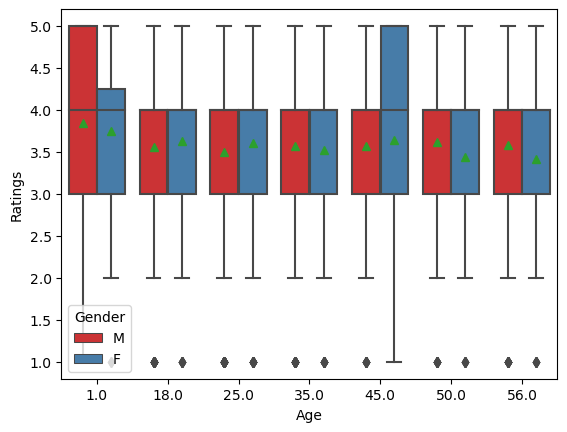

In [41]:
sns.boxplot(x=data['Age'],y=data['Ratings'],hue=data['Gender'],showmeans=True,palette='Set1')     # showmeans is for mean value

In [49]:
movies = pd.DataFrame(data.groupby(data.Category).get_group('Comedy')[:10])      # grouping moviename based on come category
movies

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
17,19.0,Ace Ventura: When Nature Calls (1995),Comedy,1,3105,5,978301713,19.0,M,1.0,10.0,48073
36,38.0,It Takes Two (1995),Comedy,1,1022,5,978300055,38.0,F,18.0,4.0,02215
50,52.0,Mighty Aphrodite (1995),Comedy,1,608,4,978301398,52.0,M,18.0,4.0,72212
61,63.0,Don't Be a Menace to South Central While Drink...,Comedy,2,2916,3,978299809,63.0,M,18.0,4.0,54902
63,65.0,Bio-Dome (1996),Comedy,2,1210,4,978298151,65.0,M,35.0,12.0,55803
67,69.0,Friday (1995),Comedy,2,3578,5,978298958,69.0,F,25.0,1.0,02143
86,88.0,Black Sheep (1996),Comedy,2,1544,4,978300174,88.0,F,45.0,1.0,02476
93,96.0,In the Bleak Midwinter (1995),Comedy,2,2278,3,978299889,95.0,M,45.0,0.0,98201
98,101.0,Bottle Rocket (1996),Comedy,2,1690,3,978300051,100.0,M,35.0,17.0,95401


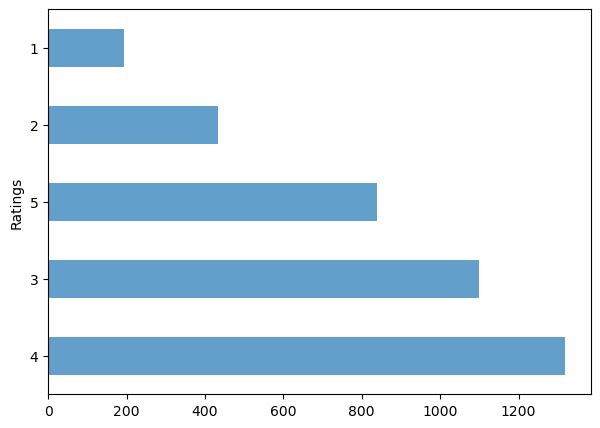

In [50]:
data['Ratings'].value_counts().plot(kind='barh',alpha=0.7,figsize=(7,5))    # plotting rating horizonal bar graph
plt.show()

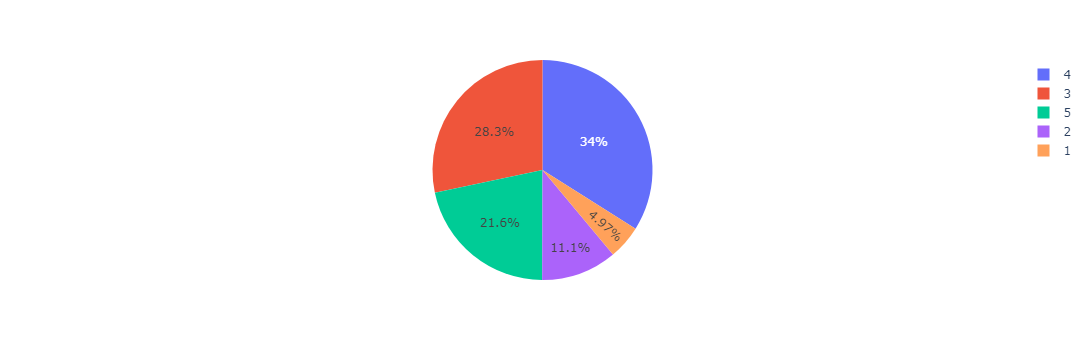

In [54]:
ratings = data["Ratings"].value_counts()       # counting the total ratings.
numbers = ratings.index                        # identifying number of rating i.e(1, 2, 3, 4, 5)
quantity = ratings.values                      # sum of total number  ratings.               
import plotly.express as px
fig = px.pie(data, values=quantity, names=numbers)
fig.show()

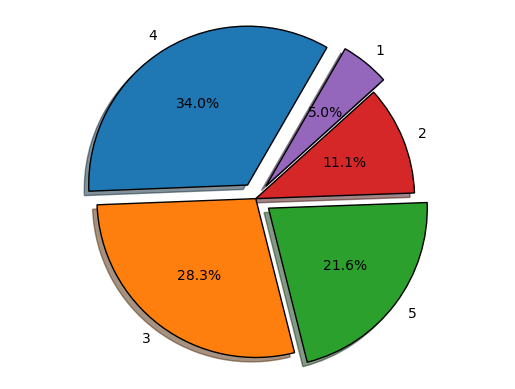

In [55]:
ratings = data["Ratings"].value_counts()       # counting the total ratings.
numbers = ratings.index                   # identifying number of rating i.e(1, 2, 3, 4, 5)
quantity = ratings.values                  # sum of total number  ratings. 
explode = (0.1, 0, 0.1, 0, 0.1)       # slices the pie chart
plt.pie(ratings, explode = explode,
        labels = numbers,
        autopct = '%1.1f%%',
        shadow = True, startangle = 60,
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')  
plt.show()                         # according to the pie charts we can see that there are 34% movies rated 4

In [57]:
data2 = data.query("Ratings == 4")                     # movies with rating = 4
print(data2["MovieName"].head(10))

2               Waiting to Exhale (1995)
7                    Sudden Death (1995)
8                       GoldenEye (1995)
10    Dracula: Dead and Loving It (1995)
11                          Balto (1995)
12                          Nixon (1995)
14                         Casino (1995)
16                     Four Rooms (1995)
18                    Money Train (1995)
25                   Now and Then (1995)
Name: MovieName, dtype: object
